# Part 1: Getting the dataset (DSFS Chapter 9)

## Exercise: Reading in crime-data from San Francisco

### Once the file has been downloaded you should read it into Python. The file has may column, and today we'll be working with 
>   - The various categories of crimes
>   - Crime over the years
>   - What time of day do crimes occur?
>   - And do certain crime-types tend to happen in specific neighborhoods?
>   - We'll play around with geo-data. 
> 
>   All of this can be easily based on the columns in the incident file. Which columns will you need?

The columns of the file is as follows:
- IncidntNum
- Category 
- Descript 
- DayOfWeek 
- Date 
- Time 
- PdDistrict 
- Resolution 
- Address 
- X 
- Y 
- Location
- PdId

So to fullfill the things we are going to work with the columns we need to use is the following:
- Category
- DayOfWeek
- Date
- Time
- PdDistrict
- Address
- X
- Y

### What is the total number of incidents in the CSV file?

In [1]:
# import csv utilities
import csv

# load data into dict
incedents = []
with open('SFPD_Incidents_-_from_1_January_2003.csv') as f:
    reader = csv.DictReader(f, delimiter=',')
    for row in reader:
        incedents.append({"Category" : row['Category'], "DayOfWeek" : row['DayOfWeek'], "Date" : row['Date'], "Time" : row['Time'], "PdDistrict" : row['PdDistrict'], "Address" : row['Address'], "X" : row['X'], "Y" : row['Y']})

# print number of total incedents in the file
print "The total number of incedents in the csv is: %d" % len(incedents)

The total number of incedents in the csv is: 1872651


# Part 2: Working with data (DSFS Chapter 10)

## Exercise: The types of crime and their popularity over time. The first field we'll dig into is the column "Category".

### Create a `set()` of all the categories of crime in the dataset. How many are there? 

In [2]:
# make set of crime categories
crimeCategories = set();
for incedent in incedents:
    crimeCategories.add(incedent['Category'])
    
print crimeCategories

set(['KIDNAPPING', 'WEAPON LAWS', 'SECONDARY CODES', 'WARRANTS', 'PROSTITUTION', 'EMBEZZLEMENT', 'SEX OFFENSES, NON FORCIBLE', 'LOITERING', 'SUICIDE', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'SUSPICIOUS OCC', 'FAMILY OFFENSES', 'ASSAULT', 'FORGERY/COUNTERFEITING', 'BAD CHECKS', 'DRUNKENNESS', 'GAMBLING', 'OTHER OFFENSES', 'RECOVERED VEHICLE', 'FRAUD', 'ARSON', 'SEX OFFENSES, FORCIBLE', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'NON-CRIMINAL', 'EXTORTION', 'PORNOGRAPHY/OBSCENE MAT', 'LIQUOR LAWS', 'TREA', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'BRIBERY', 'MISSING PERSON', 'DISORDERLY CONDUCT', 'RUNAWAY'])


### Now count the number of occurrences of each category in the dataset. What is the most commonly occurring category of crime? What is the least frequently occurring?

In [3]:
# import counter from collection
from collections import Counter

# The occurrences of crimes
occurrences = Counter()

for incedent in incedents:
    occurrences[incedent['Category']] += 1
    
# most common crime
print "most common crime is: %s" % occurrences.most_common(1)

# least common crime
print "least common crime is: %s" % occurrences.most_common()[-1:]

most common crime is: [('LARCENY/THEFT', 381656)]
least common crime is: [('TREA', 10)]


### Create a histogram over crime occurrences. Mine looks like this 

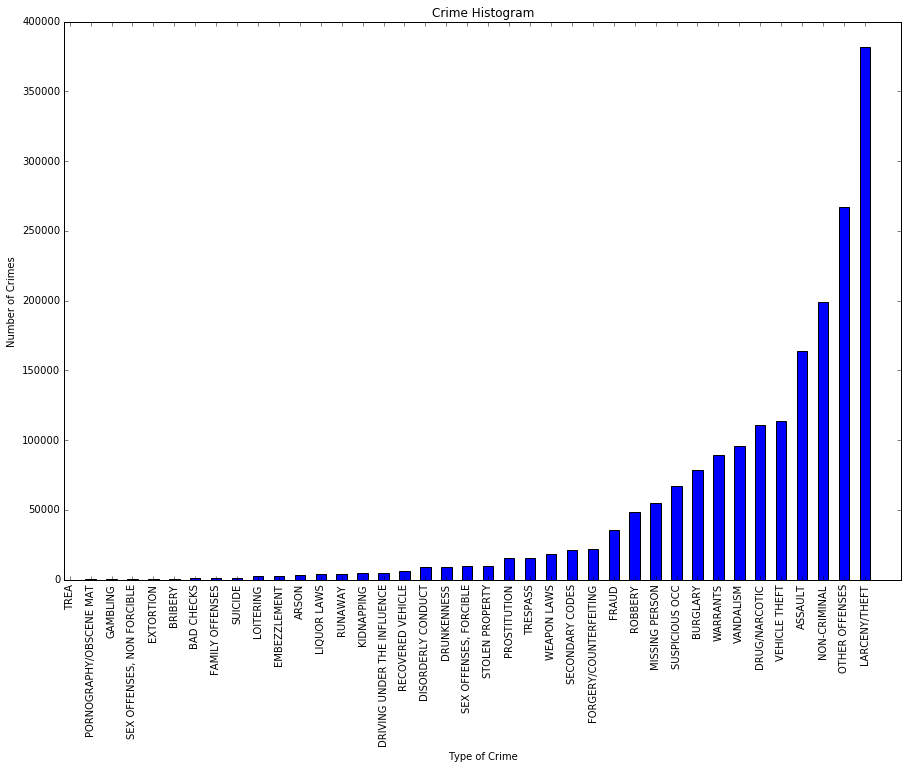

In [4]:
# Make plot inline
%matplotlib inline
#import matplotlib and numpy
import matplotlib.pyplot as plt
import numpy as np

# setup plot
fig = plt.figure(figsize=(15, 10))

# set values for x and y
labels, values = zip(*reversed(Counter(occurrences).most_common()))

# set som standard variables
indexes = np.arange(len(labels))
width = 0.5

plt.bar(indexes, values, width)
plt.ylabel('Number of Crimes')
plt.xticks(indexes + width * 0.5, labels, rotation='vertical')
plt.xlabel('Type of Crime')
plt.title('Crime Histogram')

plt.show()

### Now it's time to explore how the crime statistics change over time. To start off easily, let's count the number of crimes per year for the years 2003-2015 (the full years in the database). For that one, I used the `date` column in the CSV file and used `year = int( date.split("/")[-1] )` to extract the year of each crime. What's the average number of crimes per year? 

In [5]:
# crimes per year
# The occurrences of crimes
crimesPerYear = Counter()

for incedent in incedents:
    crimesPerYear[int(incedent['Date'].split("/")[-1])] += 1
    
# average crimes per year
# filter list for the years that we want 2003-2015
filteredYears = {key: value for key, value in crimesPerYear.items() if key in range(2003, 2016)}

# find the average
averageCrimesPerYear = sum(filteredYears.itervalues()) / len(filteredYears)
print averageCrimesPerYear

143110


### Police chief Suneman is interested in the temporal development of only a subset of categories, the so-called focus crimes. Those categories are listed below (for convenient copy-paste action). Now create bar-charts displaying the year-by-year development of each of these categories across the years 2003-2015.

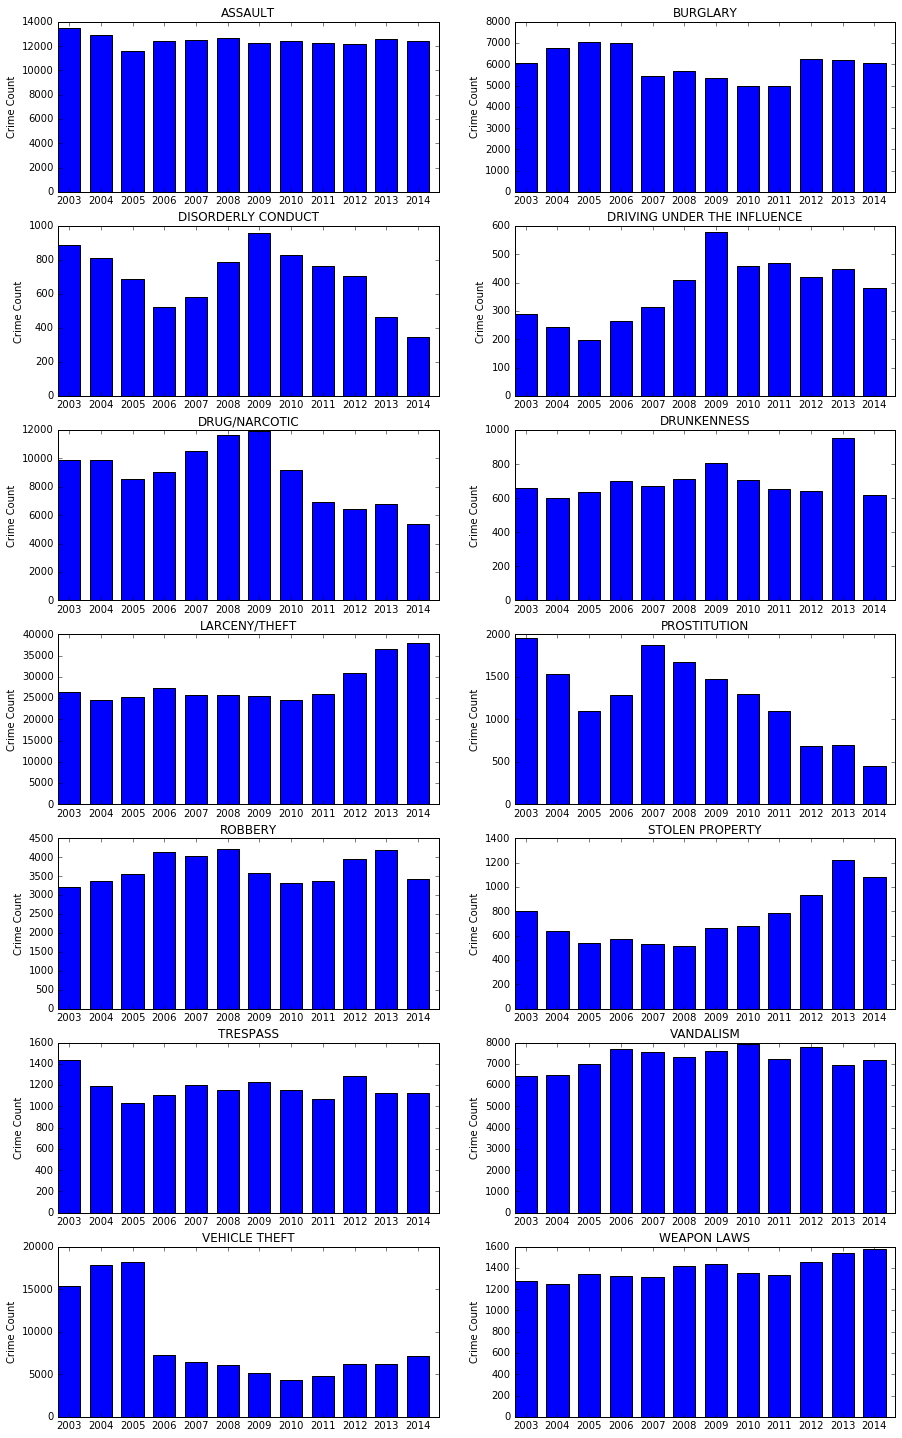

In [6]:
from collections import defaultdict
# focus crimes
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

# filter the crimes acording to type and year 
crimes = defaultdict(dict)

# Make dict where key is the focus crime and then it got a dict with the years and the number of crime of the focus type
for incedent in incedents:
    if incedent['Category'] in focuscrimes and int( incedent['Date'].split("/")[-1] ) in range(2003, 2015):
        if crimes.has_key(incedent['Category']) and crimes[incedent['Category']].has_key(int(incedent['Date'].split("/")[-1] )): 
            crimes[incedent['Category']][int(incedent['Date'].split("/")[-1] )] += 1
        else:
            crimes[incedent['Category']][int(incedent['Date'].split("/")[-1] )] = 1
            

# set figure size
fig = plt.figure(figsize=(15, 25))

# sort the crimes by name and set standart variables
focuscrimeSorted = sorted(focuscrimes)
width = 0.7
plotNumber = 1

# plot the crimes per year by using a forloop
for crime in focuscrimeSorted:  
    plt.subplot(7, 2, plotNumber)
    labels = crimes[crime].keys()
    values = crimes[crime].values() 
    indexes = np.arange(len(labels))
    plt.bar(indexes, values, width)
    plt.xticks(indexes + width * 0.5, labels)
    plt.ylabel('Crime Count')
    plt.title(crime)
    plotNumber += 1

plt.show()


### First, plot a simple histogram of the number of crimes per hour in the dataset. This piece of information is in the _Time_ column of the CSV file, and I simply used `hr = int( time.split(":")[0] )` to get this info out. There's a little strange peak at `12:00` - what do you think is going on there? (No need for a serious exploration, just some thoughts on what might be going on).

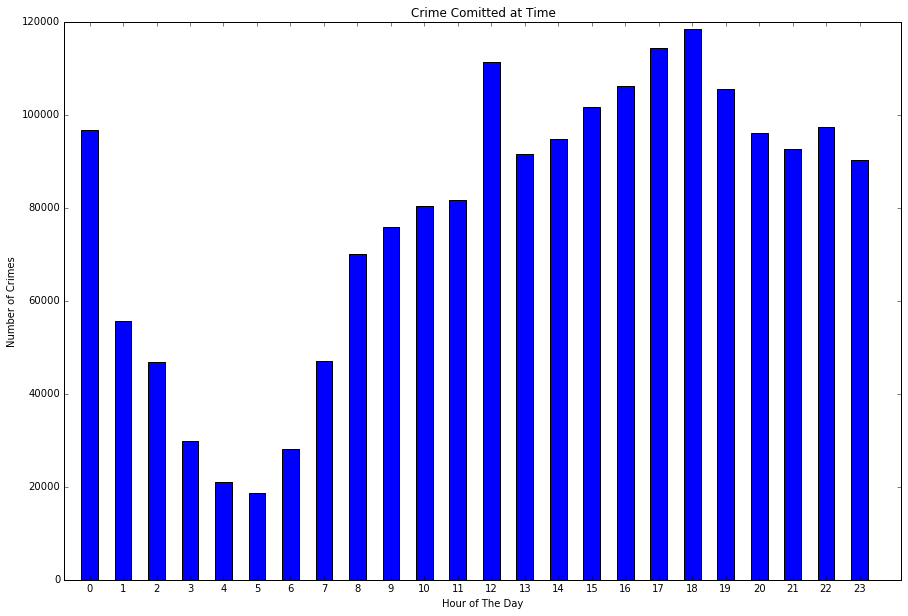

In [7]:
crimesByHour = Counter()

for incedent in incedents:
    crimesByHour[int(incedent['Time'].split(":")[0] )] += 1

# setup plot
fig = plt.figure(figsize=(15, 10))

# set values for x and y
labels, values = zip(*sorted(crimesByHour.items()))

# set som standard variables
indexes = np.arange(len(labels))
width = 0.5

# plot the graph of crimes by the hour
plt.bar(indexes + width, values, width)
plt.ylabel('Number of Crimes')
plt.xticks(indexes + width * 1.5, labels)
plt.xlabel('Hour of The Day')
plt.title('Crime Comitted at Time')

plt.show()

### Next create a plot of the count of each crime category across the 24 hours of the day. Again, comment on at least three trends in the data. 

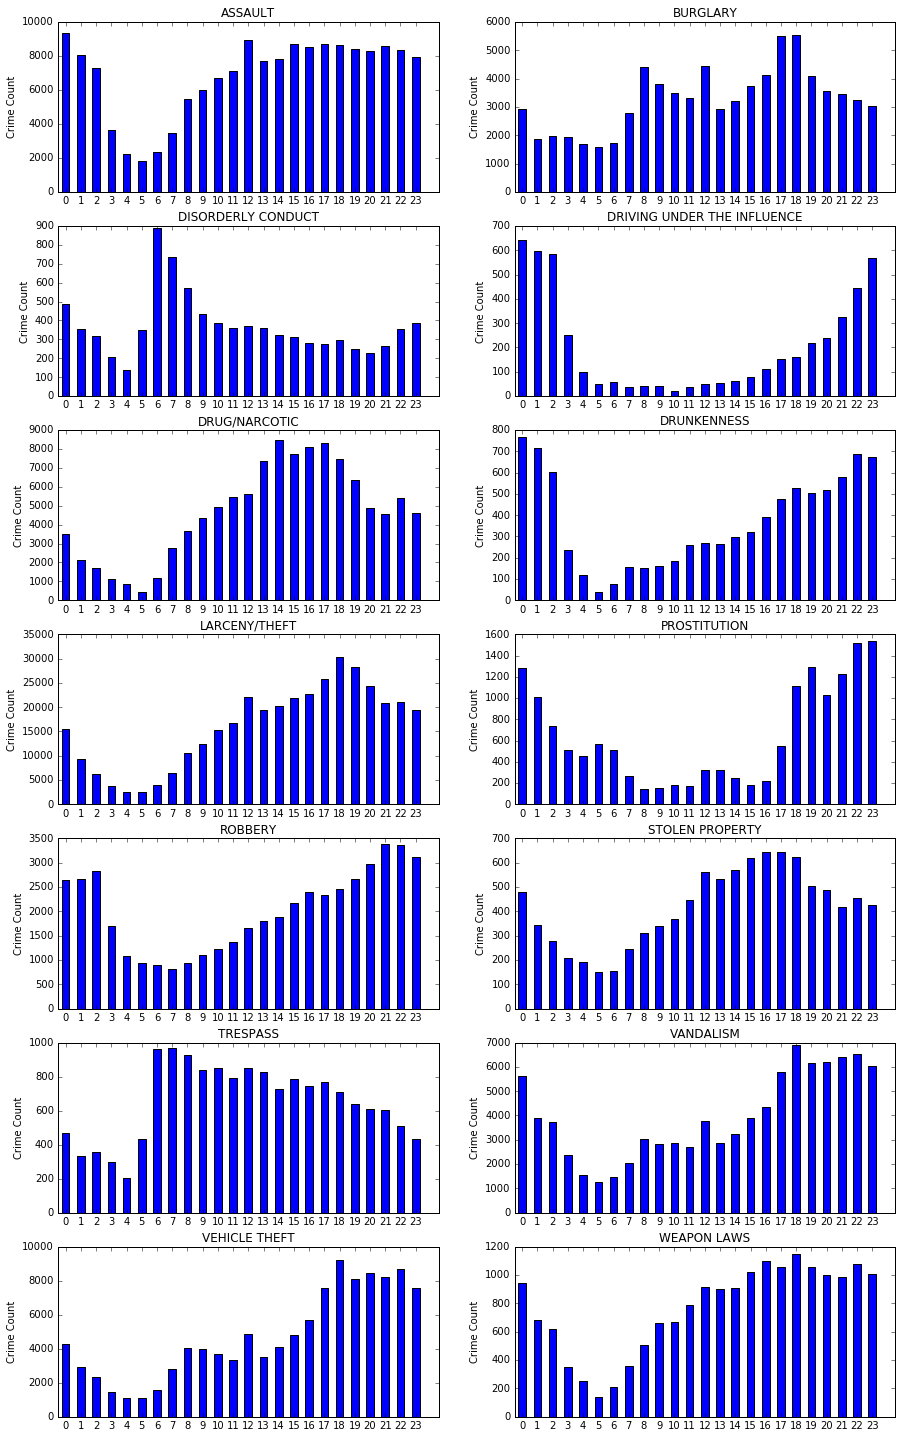

In [8]:
# filter the crimes acording type and time 
comittedTime = defaultdict(dict)

# Make dict where key is the focus crime and then it got a dict with the years and the number of crime of the focus type
for incedent in incedents:
    if incedent['Category'] in focuscrimes:
        if comittedTime.has_key(incedent['Category']) and comittedTime[incedent['Category']].has_key(int(incedent['Time'].split(":")[0] )): 
            comittedTime[incedent['Category']][int(incedent['Time'].split(":")[0])] += 1
        else:
            comittedTime[incedent['Category']][int(incedent['Time'].split(":")[0])] = 1
            

# set figure size
fig = plt.figure(figsize=(15, 25))

# reset standard var
plotNumber = 1

# plot the crimes per hour
for crime in focuscrimeSorted:
    plt.subplot(7, 2, plotNumber)
    labels = comittedTime[crime].keys()
    values = comittedTime[crime].values() 
    indexes = np.arange(len(labels))
    plt.bar(indexes + width * 0.5, values, width)
    plt.xticks(indexes + width, labels)
    plt.ylabel('Crime Count')
    plt.title(crime)
    plotNumber += 1

plt.show()

###  So now we'll be combining information about _PdDistrict_ and _Category_ to explore differences between SF's neighborhoods. First, simply list the names of SF's 10 police districts.

In [9]:
# Make district counter
policeDistricts = Counter()

# Get districts with crime numnbers
for incedent in incedents:
    policeDistricts[incedent['PdDistrict']] += 1
    
# print districts
print policeDistricts.keys()

['', 'CENTRAL', 'NORTHERN', 'INGLESIDE', 'SOUTHERN', 'MISSION', 'TENDERLOIN', 'RICHMOND', 'TARAVAL', 'BAYVIEW', 'PARK']


### Which has the most crimes? Which has the most focus crimes?

In [10]:
# most crimes
print "The police district %s, hast the most crime with %d counts of crimes." % policeDistricts.most_common(1)[0]


The police district SOUTHERN, hast the most crime with 335978 counts of crimes.


## Part 3: Machine Learning (DSFS Chapter 11)

### What do we mean by a 'feature' in a machine learning model?

feature is some kinde of thing that can be measured and then use for making a model.

e.g:
speech recognition where we extract the spectogram to show the different speech components

### What is the main problem with overfitting?

Is when we are fitting to the noice of the data, or in other words, we do not find a solution that is optimal and the model is hitting all the data points but are not connected in a "good" way

### Explain the connection between the bias-variance trade-off and overfitting/underfitting.

Underfitting is when the model is to simple and it does not explain the data correctly. Overfitting is when the data has to much noice and therefore does not show the correct image of the data.



### The `Luke is for leukemia` is a great example of why _accuracy_ is not a good measure in very unbalanced problems. You know about the incidents dataset we've been working with. Try to come up with a similar example based on the data we've been working with today.

## Part 4: A little bit of plotting

### Exercise: Create a kernel density map plot of all crimes from the CSV file. Here's my version

In [55]:
# import geolib
import geoplotlib
from geoplotlib.utils import BoundingBox

lat = [];
lon = [];

for incedent in incedents:
    lat.append(float(incedent['Y']))
    lon.append(float(incedent['X']))

geoData = {'lat': lat, 'lon': lon}

north=np.median(geoData['lat']) + 0.04
west=np.median(geoData['lon']) - 0.08
south=np.median(geoData['lat']) - 0.08
east=np.median(geoData['lon']) + 0.04


geoplotlib.kde(geoData, bw=5, cut_below=1e-4)
geoplotlib.set_bbox(BoundingBox(north=north, south=south, east=east, west=west))
geoplotlib.inline()

('smallest non-zero count', 3.5823932721920228e-09)
('max count:', 360.33139511037132)
